<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 78)
# pd.set_option('precision', 3) 

In [2]:
import yfinance as yf

def get_options_data(ticker: "Ticker en formato string", download_data=False, fecha=None):
    """
    options_yf descarga información de opciones financieras con ayuda de yfinance

    *ticker : es el símbolo de cotización de la acción
    """
    stock = yf.Ticker(ticker)
    
    if fecha is None:
        fecha = stock.options[0]
        print(f'Fechas de cierre de contrato para las opciones: \n {stock.options}')
    
    if download_data:
        print(f'Se está descargando datos de call y put de la fecha {fecha}')
        calls, puts = stock.option_chain(stock.options[0]) 
        return (calls, puts)

ticker = 'AAPL'

get_options_data(ticker, download_data=False)

Fechas de cierre de contrato para las opciones: 
 ('2023-04-28', '2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [56]:
expiry_date = '2023-12-15'
calls, puts = get_options_data(ticker, fecha=expiry_date)

Se está descargando datos de call y put de la fecha 2023-12-15


In [57]:
puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230421P00050000,2023-04-19 17:42:19+00:00,50.0,0.01,0.0,0.01,0.0,0.0,2.0,12025,7.000001,False,REGULAR,USD
1,AAPL230421P00060000,2023-04-19 17:15:58+00:00,60.0,0.01,0.0,0.01,0.0,0.0,50.0,4078,6.000002,False,REGULAR,USD
2,AAPL230421P00065000,2023-04-04 13:38:20+00:00,65.0,0.01,0.0,0.01,0.0,0.0,5.0,2619,5.500003,False,REGULAR,USD
3,AAPL230421P00070000,2023-04-14 18:35:19+00:00,70.0,0.01,0.0,0.01,0.0,0.0,5.0,5228,5.125004,False,REGULAR,USD
4,AAPL230421P00075000,2023-04-20 16:58:07+00:00,75.0,0.01,0.0,0.00,0.0,0.0,1.0,5589,0.500005,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,AAPL230421P00265000,2022-08-25 15:44:29+00:00,265.0,96.00,114.1,114.70,0.0,0.0,2.0,0,11.645511,True,REGULAR,USD
59,AAPL230421P00275000,2022-08-18 17:26:48+00:00,275.0,100.60,124.0,126.60,0.0,0.0,4.0,0,12.376955,True,REGULAR,USD
60,AAPL230421P00280000,2022-09-29 18:18:28+00:00,280.0,139.24,123.8,124.75,0.0,0.0,NaN,0,10.568363,True,REGULAR,USD
61,AAPL230421P00290000,2022-09-29 17:02:56+00:00,290.0,147.97,133.7,134.80,0.0,0.0,NaN,0,10.950198,True,REGULAR,USD


In [58]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230421C00050000,2023-04-20 17:03:47+00:00,50.0,117.51,115.75,117.35,-0.479996,-0.406811,1.0,1185,12.378909,True,REGULAR,USD
1,AAPL230421C00060000,2023-04-05 13:40:06+00:00,60.0,106.90,105.70,107.35,1.950005,1.858032,5.0,187,10.617191,True,REGULAR,USD
2,AAPL230421C00065000,2023-04-17 13:57:42+00:00,65.0,99.60,101.20,102.40,0.000000,0.000000,1.0,114,7.796875,True,REGULAR,USD
3,AAPL230421C00070000,2023-04-18 15:20:22+00:00,70.0,96.10,95.70,97.05,0.000000,0.000000,1.0,216,8.320317,True,REGULAR,USD
4,AAPL230421C00075000,2023-04-05 13:32:00+00:00,75.0,89.65,91.20,92.25,0.000000,0.000000,1.0,118,6.140627,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,AAPL230421C00270000,2023-04-17 13:30:04+00:00,270.0,0.01,0.00,0.01,0.000000,0.000000,5.0,800,2.875003,False,REGULAR,USD
62,AAPL230421C00275000,2023-04-05 18:35:35+00:00,275.0,0.01,0.00,0.01,0.000000,0.000000,2.0,410,2.937503,False,REGULAR,USD
63,AAPL230421C00280000,2023-04-18 13:30:13+00:00,280.0,0.01,0.00,0.01,0.000000,0.000000,12.0,535,3.000002,False,REGULAR,USD
64,AAPL230421C00290000,2023-04-18 19:31:05+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,9.0,748,3.250002,False,REGULAR,USD


Datos de la opción

In [59]:
calls.loc[0, :]

contractSymbol             AAPL230421C00050000
lastTradeDate        2023-04-20 17:03:47+00:00
strike                                    50.0
lastPrice                               117.51
bid                                     115.75
ask                                     117.35
change                               -0.479996
percentChange                        -0.406811
volume                                     1.0
openInterest                              1185
impliedVolatility                    12.378909
inTheMoney                                True
contractSize                           REGULAR
currency                                   USD
Name: 0, dtype: object

### Conceptos claves
- El precio de la oferta ('bid') se refiere al precio más alto que un comprador pagará por un activo.
- El precio de venta ('ask') se refiere al precio más bajo que un vendedor aceptará por un activo.
- La diferencia entre estos dos precios se conoce como 'spread'; cuanto menor es el spread, mayor es la liquidez de la garantía dada.
- Liquidez: facilidad de convertir cierta opción en efectivo.
- La volatilidad implícita es el pronóstico del mercado de un probable movimiento en el precio de un valor.
- La volatilidad implícita aumenta en los mercados bajistas y disminuye cuando el mercado es alcista.
- El último precio ('lastprice') representa el precio al que ocurrió la última operación, de una opción dada.

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha.

In [62]:
get_options_data('AAPL')

Fechas de cierre de contrato para las opciones: 
 ('2023-04-21', '2023-04-28', '2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [70]:
fecha1 = '2024-09-20'
fecha2 = '2023-08-18'
ticker = 'AAPL'

calls_f1, puts_f1 = get_options_data(ticker, download_data=True, fecha=fecha1)

calls_f2, puts_f2 = get_options_data(ticker, download_data=True, fecha=fecha2)

calls_f1


Se está descargando datos de call y put de la fecha 2024-09-20
Se está descargando datos de call y put de la fecha 2023-08-18


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230421C00050000,2023-04-20 17:03:47+00:00,50.0,117.51,115.75,117.35,-0.479996,-0.406811,1.0,1185,12.378909,True,REGULAR,USD
1,AAPL230421C00060000,2023-04-05 13:40:06+00:00,60.0,106.90,105.70,107.35,1.950005,1.858032,5.0,187,10.617191,True,REGULAR,USD
2,AAPL230421C00065000,2023-04-17 13:57:42+00:00,65.0,99.60,101.20,102.40,0.000000,0.000000,1.0,114,7.796875,True,REGULAR,USD
3,AAPL230421C00070000,2023-04-18 15:20:22+00:00,70.0,96.10,95.70,97.05,0.000000,0.000000,1.0,216,8.320317,True,REGULAR,USD
4,AAPL230421C00075000,2023-04-05 13:32:00+00:00,75.0,89.65,91.20,92.25,0.000000,0.000000,1.0,118,6.140627,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,AAPL230421C00270000,2023-04-17 13:30:04+00:00,270.0,0.01,0.00,0.01,0.000000,0.000000,5.0,800,2.875003,False,REGULAR,USD
62,AAPL230421C00275000,2023-04-05 18:35:35+00:00,275.0,0.01,0.00,0.01,0.000000,0.000000,2.0,410,2.937503,False,REGULAR,USD
63,AAPL230421C00280000,2023-04-18 13:30:13+00:00,280.0,0.01,0.00,0.01,0.000000,0.000000,12.0,535,3.000002,False,REGULAR,USD
64,AAPL230421C00290000,2023-04-18 19:31:05+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,9.0,748,3.250002,False,REGULAR,USD


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
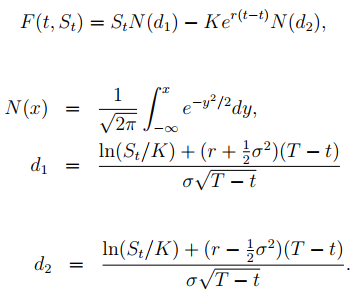
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

## Volatility smile 
-  Cuando las opciones con la misma fecha de vencimiento y el mismo activo subyacente, pero diferentes precios de ejercicio, se grafican por la volatilidad implícita, la tendencia es que ese gráfico muestre una sonrisa.
-  La sonrisa muestra que las opciones más alejadas 'in- or out-of-the-money' tienen la mayor volatilidad implícita.
- No todas las opciones tendrán una sonrisa de volatilidad implícita. Las opciones de acciones a corto plazo y las opciones relacionadas con la moneda tienen más probabilidades de tener una sonrisa de volatilidad

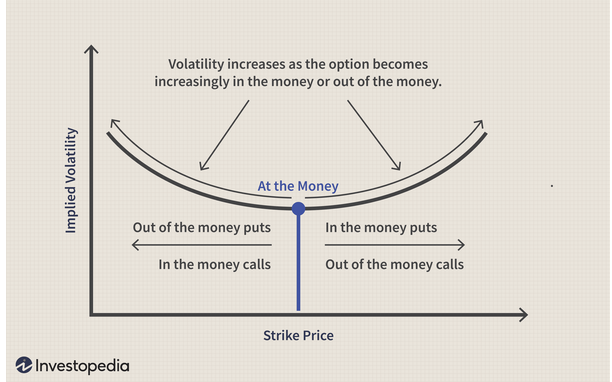

> Fuente: https://www.investopedia.com/terms/v/volatilitysmile.asp

> ### Validar para el call seleccionado. Encontrar el valor del activo subyacente [link](https://es.finance.yahoo.com/quote/AAPL/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABR84JCfGvfOqqwhhdyZDkm_jZhQyKTDrxwAfmp9jXl-VsvMSUbdIyj3UXrctm6rOvJ33GCHcZs3cYOkr60ISHUmiKBpNV3pffEWVAb1gyuQcT4U4LhhvaO3LASGq9oL1Bn9rCAODNzwokwbdHCvYx4WT4Au8QwCatcc3IbwU6yF)

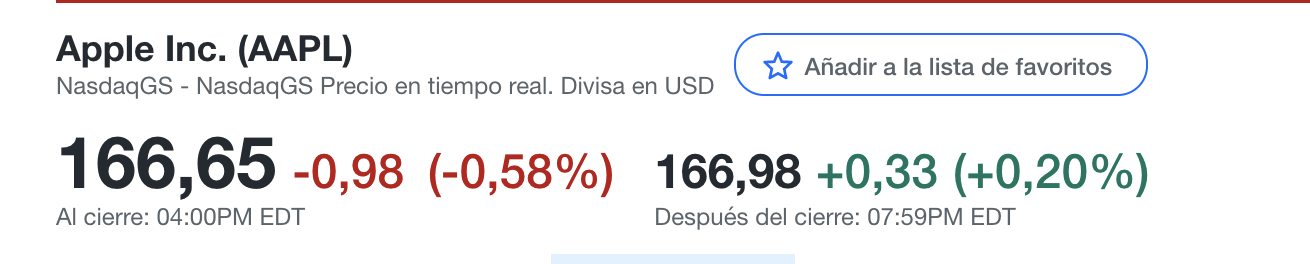

In [71]:
calls_f1.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230421C00050000,2023-04-20 17:03:47+00:00,50.0,117.51,115.75,117.35,-0.479996,-0.406811,1.0,1185,12.378909,True,REGULAR,USD
1,AAPL230421C00060000,2023-04-05 13:40:06+00:00,60.0,106.90,105.70,107.35,1.950005,1.858032,5.0,187,10.617191,True,REGULAR,USD
2,AAPL230421C00065000,2023-04-17 13:57:42+00:00,65.0,99.60,101.20,102.40,0.000000,0.000000,1.0,114,7.796875,True,REGULAR,USD
3,AAPL230421C00070000,2023-04-18 15:20:22+00:00,70.0,96.10,95.70,97.05,0.000000,0.000000,1.0,216,8.320317,True,REGULAR,USD
4,AAPL230421C00075000,2023-04-05 13:32:00+00:00,75.0,89.65,91.20,92.25,0.000000,0.000000,1.0,118,6.140627,True,REGULAR,USD


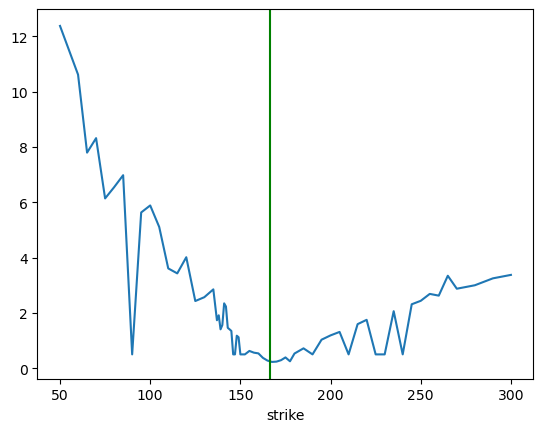

In [74]:
# para los call de la fecha 1

ax = calls_f1.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

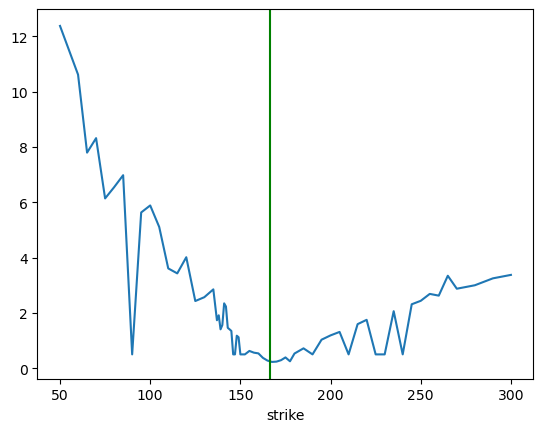

In [75]:
# para los call de la fecha 2
ax = calls_f2.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

Analicemos ahora datos de los `put`

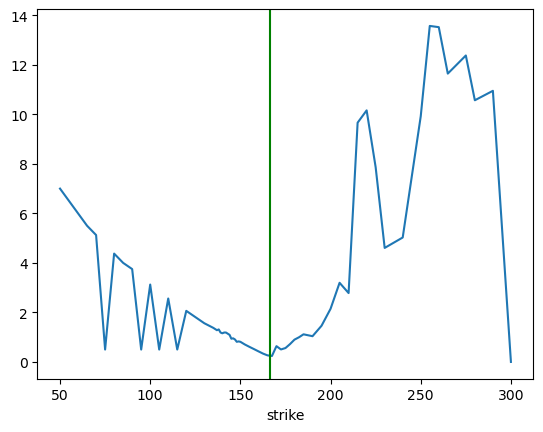

In [76]:
ax = puts_f1.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

Para los `put` de la `fecha 1`

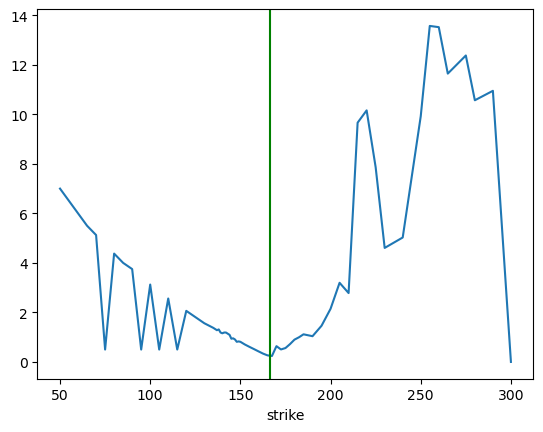

In [77]:
ax = puts_f2.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [3]:
# Sobre escribir el paquete de yahoo finance a pandas datareader
import yfinance as yf
yf.pdr_override()

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Si la cantidad de activos fue pasado cómo string entonces convertir el resultado a DataFrame
    if isinstance(tickers, str):
        closes = closes.to_frame(tickers)
    elif len(tickers) == 1:
        closes = closes.to_frame(tickers[0])
        
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

[*********************100%***********************]  1 of 1 completed


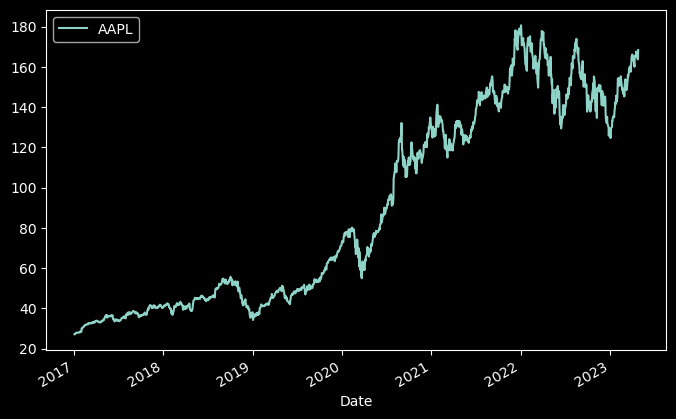

In [4]:
plt.style.use(['dark_background'])

ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [5]:
closes_aapl.iloc[-1]

AAPL    168.410004
Name: 2023-04-27 00:00:00, dtype: float64

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [6]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

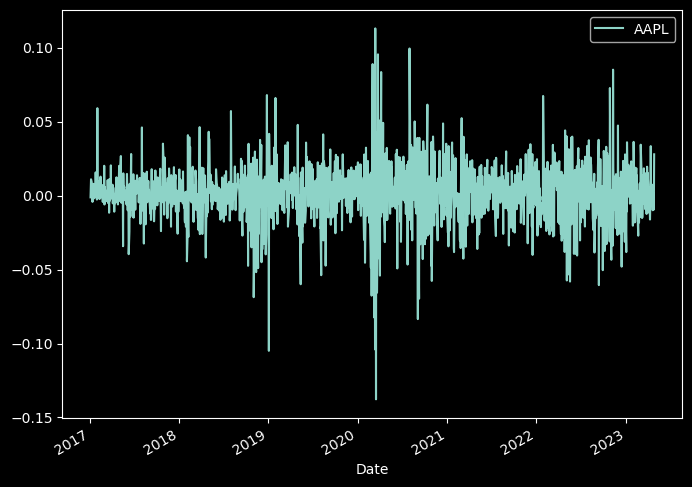

In [7]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [8]:
get_options_data('AAPL')

Fechas de cierre de contrato para las opciones: 
 ('2023-04-28', '2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [20]:
expiry = '2024-01-19'
call, put = get_options_data('AAPL', download_data=True, fecha=expiry)

Se está descargando datos de call y put de la fecha 2024-01-19


In [21]:
call.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230428C00050000,2023-04-27 14:53:17+00:00,50.0,116.40,117.55,119.15,1.200005,1.041671,3.0,28,12.578127,True,REGULAR,USD
1,AAPL230428C00055000,2023-04-25 15:21:19+00:00,55.0,110.55,112.60,114.10,0.000000,0.000000,2.0,4,11.507815,True,REGULAR,USD
2,AAPL230428C00060000,2023-04-25 15:55:49+00:00,60.0,104.95,106.25,109.10,0.000000,0.000000,2.0,3,10.671878,True,REGULAR,USD
3,AAPL230428C00070000,2023-04-18 17:04:52+00:00,70.0,95.78,97.25,99.40,0.000000,0.000000,NaN,1,9.847660,True,REGULAR,USD
4,AAPL230428C00080000,2023-04-18 17:04:52+00:00,80.0,85.85,87.70,89.25,0.000000,0.000000,NaN,1,5.656253,True,REGULAR,USD


<AxesSubplot: xlabel='strike'>

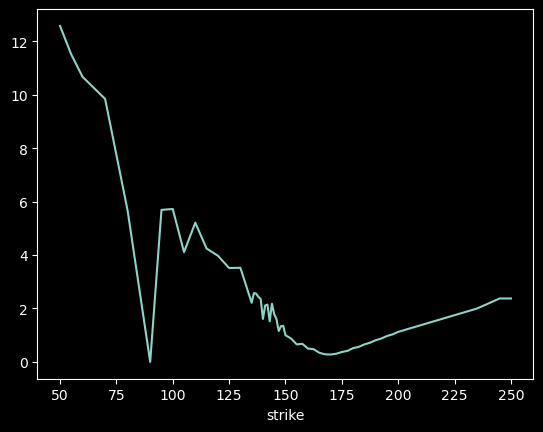

In [12]:
call.set_index('strike')['impliedVolatility'].plot()

In [13]:
call['strike'].unique()

array([ 50. ,  55. ,  60. ,  70. ,  80. ,  90. ,  95. , 100. , 105. ,
       110. , 115. , 120. , 125. , 130. , 135. , 136. , 137. , 138. ,
       139. , 140. , 141. , 142. , 143. , 144. , 145. , 146. , 147. ,
       148. , 149. , 150. , 152.5, 155. , 157.5, 160. , 162.5, 165. ,
       167.5, 170. , 172.5, 175. , 177.5, 180. , 182.5, 185. , 187.5,
       190. , 192.5, 195. , 197.5, 200. , 205. , 210. , 235. , 245. ,
       250. ])

In [15]:
# Strike price
K = 165
opcion_valuar = call[call['strike'] == K]
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
35,AAPL230428C00165000,2023-04-27 19:59:49+00:00,165.0,3.55,3.25,3.6,2.87,422.0588,68170.0,44437,0.34278,True,REGULAR,USD


In [18]:
print('Precio del activo subyacente actual = ',closes_aapl.iloc[-1].values)

Precio del activo subyacente actual =  [168.41000366]


# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

## Rendimiento Simple

In [19]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

,AAPL
Date,
2017-01-04,-0.001119
2017-01-05,0.005085
2017-01-06,0.011148
2017-01-09,0.009160
2017-01-10,0.001008
...,...
2023-04-21,-0.009781
2023-04-24,0.001879
2023-04-25,-0.009436


In [22]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = expiry

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2023-04-27', '2023-04-28', '2023-05-01', '2023-05-02',
                '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
                '2023-05-09', '2023-05-10',
                ...
                '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
                '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
                '2024-01-18', '2024-01-19'],
               dtype='datetime64[ns]', length=192, freq='B'),
 192)

### Mostrar como simular precios usando los rendimientos

In [23]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2023-04-27,3.300631e-04,-4.531901e-03,-1.539156e-03,2.356192e-02,-5.891135e-03,3.228947e-02,4.906351e-03,...,-2.513458e-03,-3.414624e-02,1.190923e-02,1.880942e-02,1.094371e-02,4.463630e-02,1.814024e-02
2023-04-28,6.727260e-06,-6.387051e-05,4.107781e-05,-2.406799e-04,4.733957e-05,-1.046654e-03,-1.228735e-04,...,-1.496888e-05,-1.350842e-04,7.029813e-06,-1.444799e-04,2.619997e-04,7.494195e-04,8.721899e-05
2023-05-01,-1.080183e-07,-9.426953e-07,-2.046694e-07,4.369625e-07,-1.850702e-07,-2.255105e-05,3.070950e-06,...,-3.313395e-07,-2.467073e-06,7.754935e-08,7.060964e-07,7.308631e-07,7.169652e-06,-2.443537e-06
2023-05-02,2.510402e-10,1.948556e-09,-4.100131e-09,-9.554384e-09,-8.230250e-10,-1.023649e-08,-2.915305e-08,...,7.024765e-09,1.347667e-08,-9.424096e-10,-4.120254e-09,-8.710909e-09,-1.315060e-07,5.284773e-08
2023-05-03,5.082732e-13,-1.595450e-11,3.773220e-12,1.039606e-10,-1.532731e-11,-1.334555e-10,2.724334e-10,...,1.230016e-10,-2.952701e-10,-3.041429e-12,5.126120e-11,-2.412984e-10,2.840669e-09,-8.263646e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,...,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
2024-01-16,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,...,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
2024-01-17,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
2024-01-18,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00


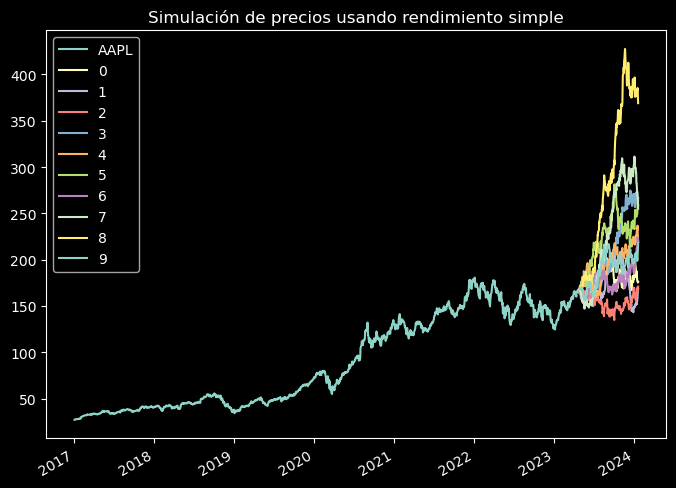

In [32]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Asignar al día de hoy el precio actual 
S_T.iloc[0, :] = closes_aapl.iloc[-1]

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

In [27]:
S_T.T.shape

(10000, 192)

## Rendimiento Logarítmico

0.40783948559001576

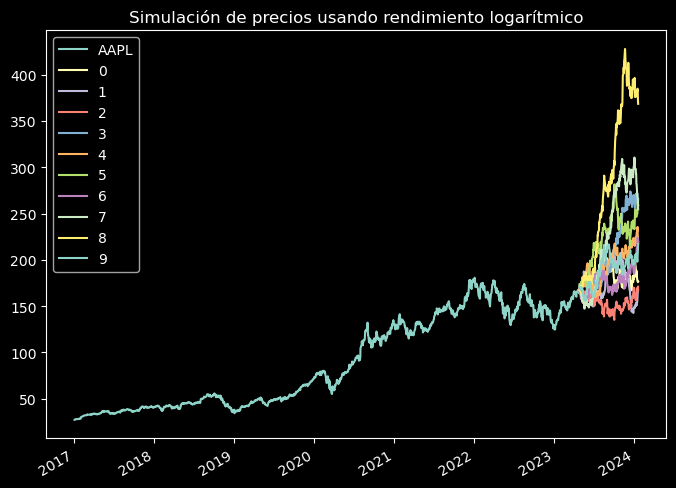

In [33]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [34]:
S_T2.iloc[0, :] = closes_aapl.iloc[-1]
S_T2

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2023-04-27,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004,...,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004
2023-04-28,171.869325,169.963047,163.658305,170.607849,166.016258,168.324110,164.988104,...,168.925817,163.337348,170.463258,170.229587,174.323214,179.013323,172.254248
2023-05-01,169.098358,172.457766,162.813339,170.265528,165.336490,171.958130,160.883564,...,172.674597,166.316693,172.321521,169.366841,174.776683,180.699876,167.461736
2023-05-02,168.673245,172.068444,166.076864,166.549890,166.041654,172.003124,159.332392,...,169.018670,165.378556,170.206718,168.348735,172.672114,177.380602,163.846271
2023-05-03,168.982676,170.632079,165.892128,164.715275,169.131209,174.227377,157.819575,...,171.971977,161.762402,170.724215,166.234645,177.489389,173.555589,161.272411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,177.674922,155.217384,164.017000,272.101747,231.047555,249.552060,214.584299,...,204.699301,198.287961,206.840703,163.073867,183.341247,283.201797,253.505838
2024-01-16,177.632004,159.345238,170.111942,270.986518,235.578397,254.418751,224.143647,...,201.232857,195.502558,213.228498,160.433006,184.396142,286.807660,266.818822
2024-01-17,176.574786,163.985994,166.652128,259.444687,227.436671,262.368934,223.891838,...,209.065628,200.047246,210.320460,156.941775,186.658807,285.039384,267.426057
2024-01-18,175.838422,165.496376,166.991522,255.082332,225.115534,259.773043,221.786507,...,207.921261,195.804056,211.533050,152.739552,183.178115,291.093958,274.582326


In [35]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019566337935096847, 0.019572019270410742)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max(S_T - K,0)
$$

In [38]:
S_T2.shape

(192, 10000)

Prima    45.682531
Name: 2024-01-19 00:00:00, dtype: float64

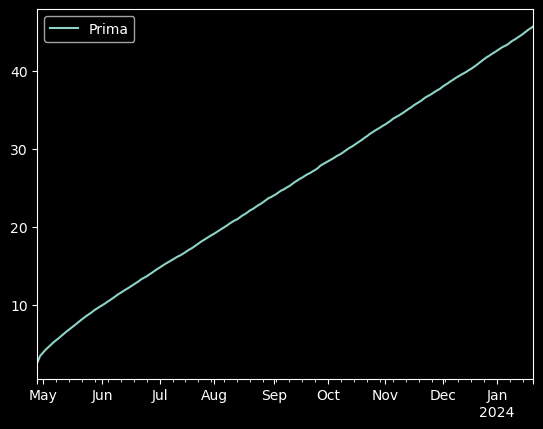

In [39]:
strike = K
call = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(S_T2-strike, 0).mean(axis=1)}, index=dates)
call.plot();
call.iloc[-1]

In [37]:
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
35,AAPL230428C00165000,2023-04-27 19:59:49+00:00,165.0,3.55,3.25,3.6,2.87,422.0588,68170.0,44437,0.34278,True,REGULAR,USD


## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [40]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0011489230556610292, 0.019572019270410742)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [49]:
# Tasa de bonos de 1 yr de fecha 27/04/23 -> 4.60%
r = 0.046/365 # Tasa diaria

In [50]:
r

0.00012602739726027396

- Simularemos el tiempo de contrato desde `HOY` hasta la fecha de `Expiry`, 10 escenarios:
    
    - Generar fechas

In [42]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = pd.to_datetime(expiry)

nscen = 10
dates = pd.date_range(start=today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2023-04-27', '2023-04-28', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
               '2023-05-09', '2023-05-10',
               ...
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', length=192, freq='B')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [43]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,3,4,5,6,7,8,9
2023-04-27,0.020465,0.023380,0.000648,-0.016532,-0.015573,-0.006074,0.011438,0.010435,0.005230,-0.032343
2023-04-28,0.047079,0.057267,-0.041194,0.002137,-0.012998,0.002856,0.024060,0.036726,0.001823,-0.086704
2023-05-01,0.043357,0.081470,-0.029080,-0.007227,-0.000764,0.018259,0.017115,0.006033,0.032964,-0.063231
2023-05-02,0.042070,0.059500,-0.065300,-0.014986,-0.001455,0.004542,-0.015440,-0.026354,0.000526,-0.067500
2023-05-03,0.034644,0.025235,-0.067502,0.000689,0.004237,0.010516,-0.036275,-0.039478,-0.015562,-0.077088
...,...,...,...,...,...,...,...,...,...,...
2024-01-15,-0.149511,0.045752,0.140042,-0.134949,0.168484,0.039049,-0.382987,-0.102661,-0.251926,-0.657715
2024-01-16,-0.151312,0.053998,0.129025,-0.111617,0.175030,0.035048,-0.359310,-0.099886,-0.256925,-0.698439
2024-01-17,-0.168078,0.047295,0.122589,-0.130632,0.160945,0.050777,-0.367186,-0.110400,-0.263243,-0.702944
2024-01-18,-0.163746,0.024748,0.130650,-0.119588,0.161155,0.051938,-0.385884,-0.047678,-0.258231,-0.700819


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [44]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,3,4,5,6,7,8,9
2023-04-27,171.891967,172.393747,168.519131,165.648814,165.807667,167.390170,170.347298,170.176556,169.293063,163.050247
2023-04-28,176.528221,178.335871,161.613423,168.770233,166.235195,168.891635,172.511100,174.710066,168.717257,154.423304
2023-05-01,175.872357,182.704676,163.583138,167.197312,168.281312,171.513299,171.317133,169.429036,174.054048,158.091015
2023-05-02,175.646173,178.734553,157.764185,165.905077,168.165130,169.176680,165.829679,164.029697,168.498666,157.417551
2023-05-03,174.346725,172.713957,157.417188,168.525998,169.125004,170.190266,162.410389,161.890980,165.809518,155.915448
...,...,...,...,...,...,...,...,...,...,...
2024-01-15,145.022697,176.294041,193.725790,147.149982,199.314712,175.116365,114.825654,151.978673,130.905507,87.242039
2024-01-16,144.761777,177.753722,191.603104,150.623637,200.623773,174.417152,117.576726,152.401054,130.252732,83.760561
2024-01-17,142.354997,176.566265,190.373947,147.786594,197.817871,177.182199,116.654351,150.807128,129.432322,83.384069
2024-01-18,142.973019,172.629783,191.914869,149.427805,197.859344,177.388095,114.493463,160.568945,130.082737,83.561438


- Graficar:

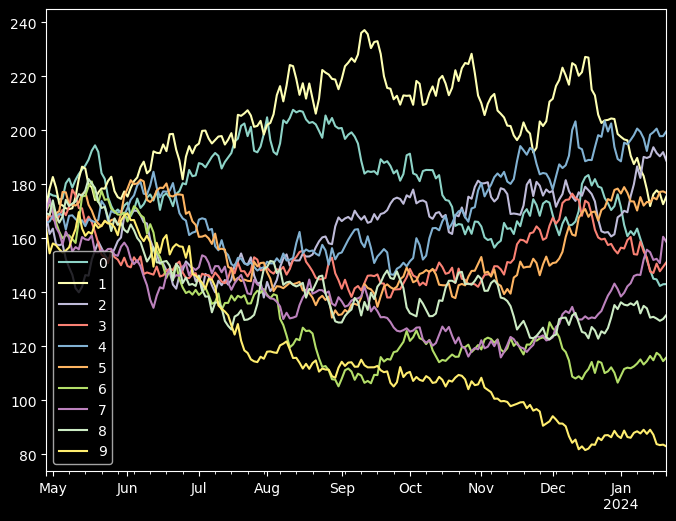

In [45]:
sim_closes.plot(figsize=(8,6));

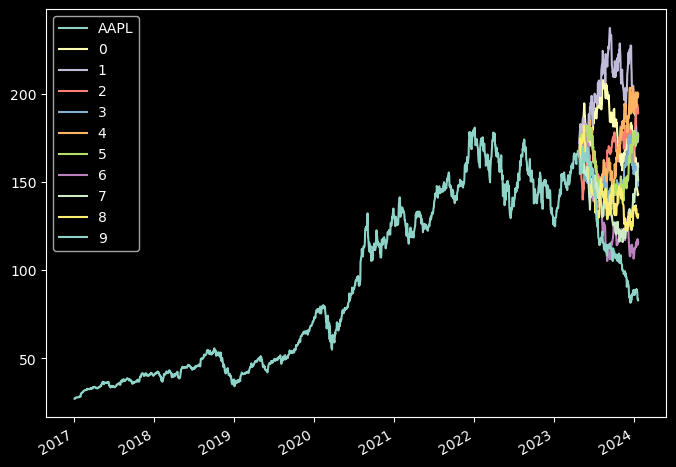

In [46]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [47]:
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
35,AAPL230428C00165000,2023-04-27 19:59:49+00:00,165.0,3.55,3.25,3.6,2.87,422.0588,68170.0,44437,0.34278,True,REGULAR,USD


In [51]:
# 252 días de negociación en un año 
sigma = sigma/np.sqrt(252)
sigma

0.0012329213248778725

In [61]:
from datetime import date
Hoy = date.today()
K = K  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, end=expiry, freq='B')
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

# strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,3,4,5,6,...,99993,99994,99995,99996,99997,99998,99999
2023-04-27,168.680164,168.390503,168.269196,168.537869,168.517614,168.342821,168.448260,...,168.625114,168.459290,168.460949,168.389920,168.017170,168.424864,168.476677
2023-04-28,168.812473,168.123123,168.289558,168.629894,168.807172,168.415255,168.043503,...,168.307154,168.707149,168.932066,168.389992,167.871189,168.486526,168.370085
2023-05-01,168.887692,168.117594,168.616103,168.904958,168.736433,167.990716,168.329405,...,168.346946,168.570088,169.106297,168.829519,167.785990,168.673690,168.453154
2023-05-02,168.277409,168.402723,168.399677,169.021015,168.687440,167.901758,168.596971,...,168.434257,168.446108,169.301511,169.014856,167.646409,168.333747,168.571831
2023-05-03,168.758417,168.354382,168.460860,168.726841,168.532844,167.884627,168.453685,...,168.421128,168.216040,169.240964,169.122346,168.090326,168.795551,168.425885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,174.983603,176.479127,171.738069,175.947904,171.550679,178.387712,170.599414,...,167.111164,172.121379,174.881303,170.512059,174.038902,177.354612,175.930871
2024-01-16,174.934550,176.829319,171.332997,175.927587,171.481398,178.083129,170.917591,...,166.963953,171.848434,174.511347,170.353437,174.126138,177.544239,175.777847
2024-01-17,174.961941,176.950290,171.387536,175.896058,171.477595,178.284040,170.973974,...,166.953063,171.984031,175.097310,170.262910,174.183603,177.523858,175.820906
2024-01-18,175.060789,177.057048,171.462195,175.885790,171.828393,178.325587,171.212793,...,167.179055,172.095957,174.931520,170.142340,174.174270,177.568380,175.685741


In [54]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes

,0,1,2,3,4,5,6,...,99993,99994,99995,99996,99997,99998,99999
2023-04-27,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004,...,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004,168.410004
2023-04-28,168.460820,168.914619,168.093502,168.499706,168.062894,168.668283,169.084010,...,168.414186,168.520055,168.174426,168.533255,168.615624,168.467642,168.442141
2023-04-29,168.878328,168.727412,168.360138,168.579379,168.211543,168.794426,169.074604,...,168.433597,168.639097,167.954347,168.595654,168.550452,168.918782,168.580749
2023-04-30,168.919006,168.533945,168.513276,168.329650,168.395499,168.846253,169.131001,...,168.490593,168.530764,168.121537,168.294060,168.472453,168.883877,168.663774
2023-05-01,169.104464,168.983437,168.539117,168.664036,168.391457,169.092003,169.197897,...,168.625475,168.627481,168.473282,168.244227,168.955505,168.961719,168.717029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,170.623465,170.585215,171.257103,174.452070,177.599587,172.594162,175.381498,...,173.921083,175.290967,177.292160,167.560017,175.850526,171.267133,170.429457
2023-11-01,170.741553,170.558481,171.593231,174.157216,177.647962,172.851697,175.178744,...,174.048240,174.942748,177.459627,167.261631,176.101196,171.261227,170.274921
2023-11-02,171.128971,170.558547,171.637198,173.995989,177.331740,172.546044,175.288507,...,173.973410,174.810411,177.435764,167.599872,176.131545,171.278928,170.240925
2023-11-03,171.503945,170.631149,171.997187,173.710421,177.677677,172.958509,175.225592,...,174.205203,174.746664,177.393372,167.418530,176.291194,171.388232,170.484278


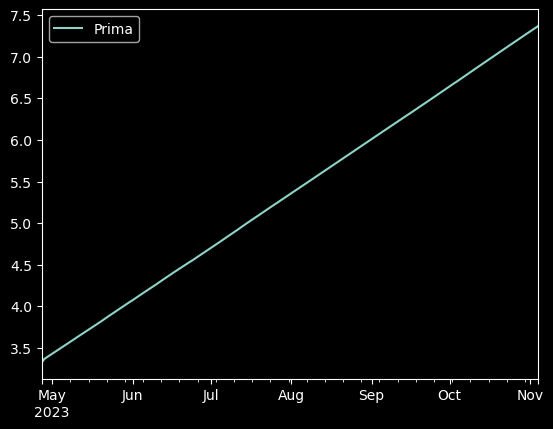

In [55]:
strike = K
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, index=dates)
call.plot();


La valuación de la opción es:

In [56]:
call.iloc[-1]

Prima    7.365332
Name: 2023-11-04 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [57]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)


(7.341330208601674, 7.389333510144615)
(7.341330666731047, 7.389333052015242)


## Precios simulados usando técnicas de reducción de varianza

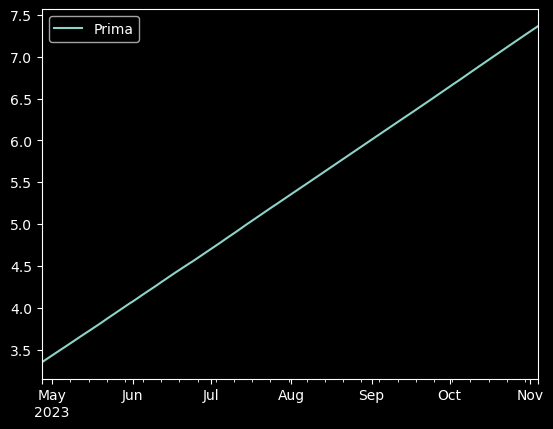

In [58]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes2-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [59]:
call.iloc[-1]

Prima    7.365332
Name: 2023-11-04 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [60]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(7.341330208601674, 7.389333510144615)
(7.341330208601674, 7.389333510144615)


### Análisis de la distribución de los rendimientos

### Ajustando norm

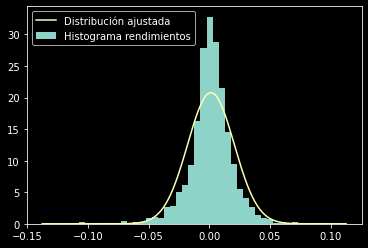

In [60]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


### Ajustando t

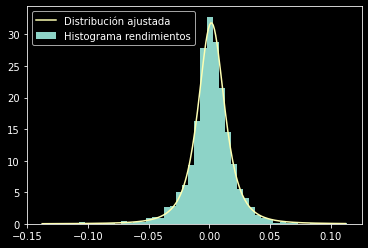

In [62]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen, df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

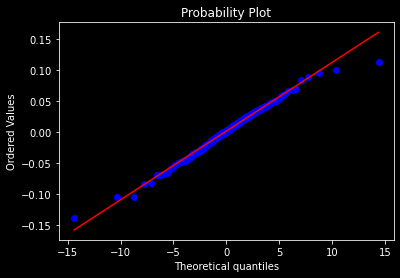

In [65]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [ ]:
ndays = 109 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [ ]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [ ]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

In [ ]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

In [ ]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

In [ ]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [ ]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

In [ ]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [ ]:
call_hist.iloc[-1]

In [ ]:
opcion_valuar['JSON']

Intervalo de confianza del 95%

In [ ]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


# <font color = 'red'> Ejercicio: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modified by Oscar Jaramillo Z.
</footer>